In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Load the dataset
data = pd.read_csv(r"F:\HND\4th stage\ML\assement\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [50]:
# Remove Outliers
# Use IQR 
# Define a function to calculate the IQR and remove outliers
def remove_iqr_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



In [51]:
# List of columns to check for outliers
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [52]:
# Remove outliers
cleaned_data = remove_iqr_outliers(data, columns_to_check)

# Display the  cleaned dataset
cleaned_data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [53]:
x = cleaned_data.drop('Outcome',axis='columns')

In [54]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [55]:
y =cleaned_data['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64

In [56]:
x.shape

(636, 8)

In [57]:
y.shape

(636,)

# Bar Chart

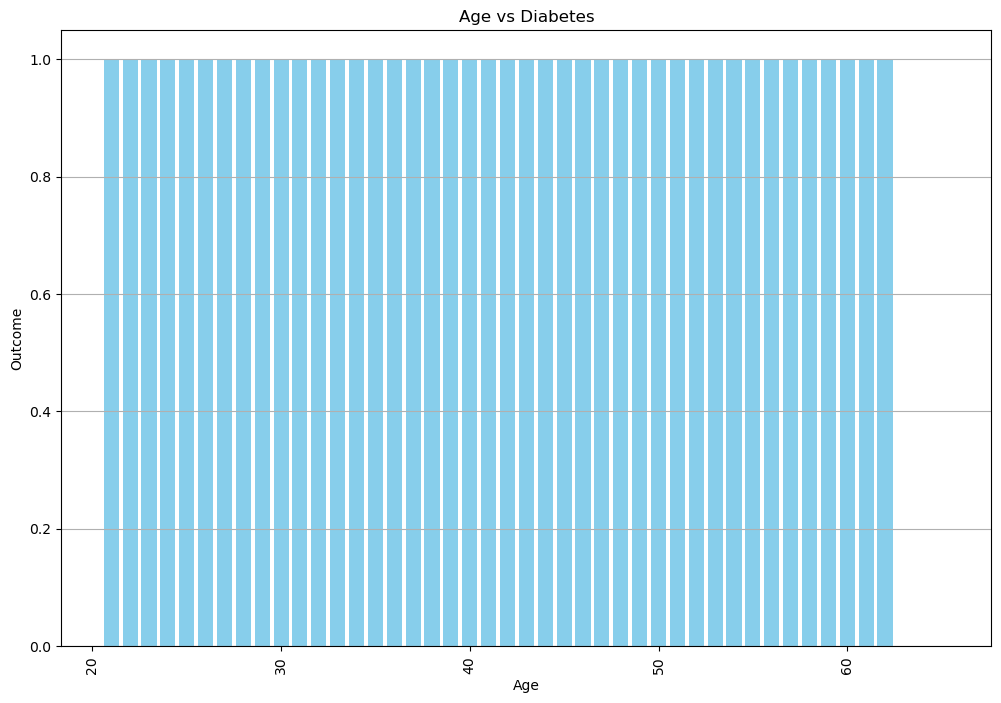

In [101]:

# Define the columns to plot
age = cleaned_data['Age']
diabetes = cleaned_data['Outcome']

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(age, diabetes, color='skyblue')
plt.title('Age vs Diabetes')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

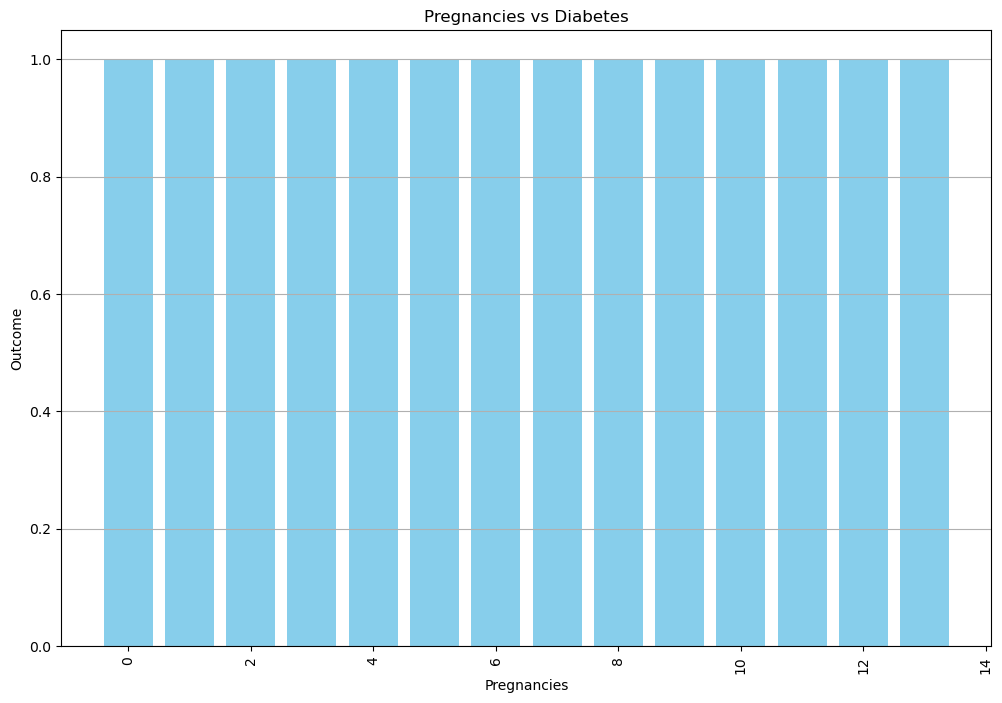

In [89]:

# Define the columns to plot
age = cleaned_data['Pregnancies']
diabetes = cleaned_data['Outcome']

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(age, diabetes, color='skyblue')
plt.title('Pregnancies vs Diabetes')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

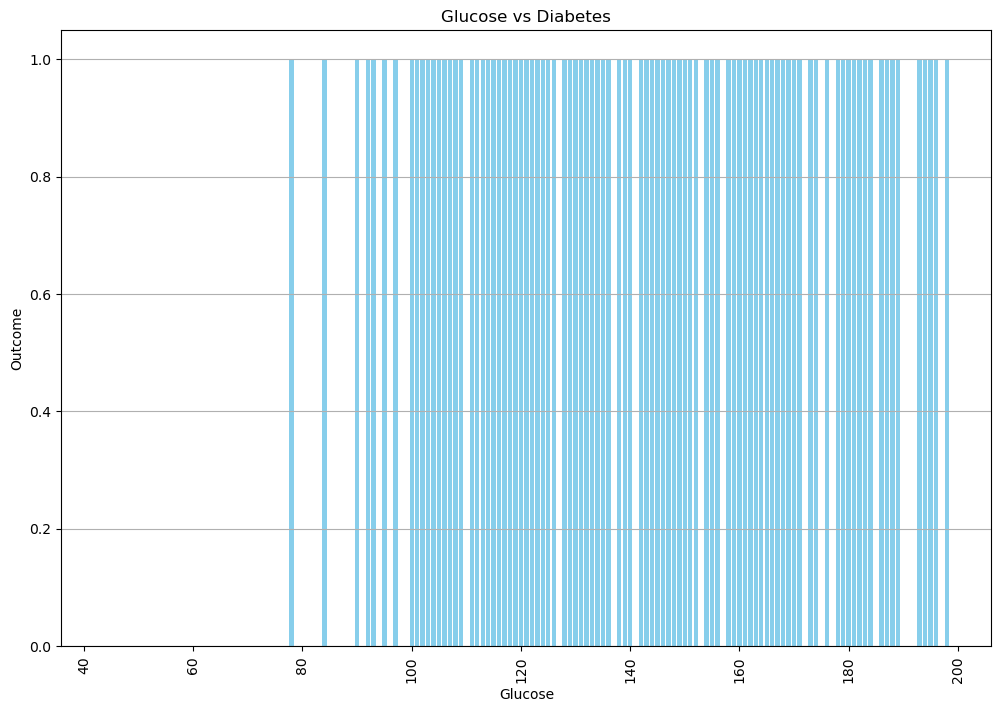

In [94]:

# Define the columns to plot
age = cleaned_data['Glucose']
diabetes = cleaned_data['Outcome']

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(age, diabetes, color='skyblue')
plt.title('Glucose vs Diabetes')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

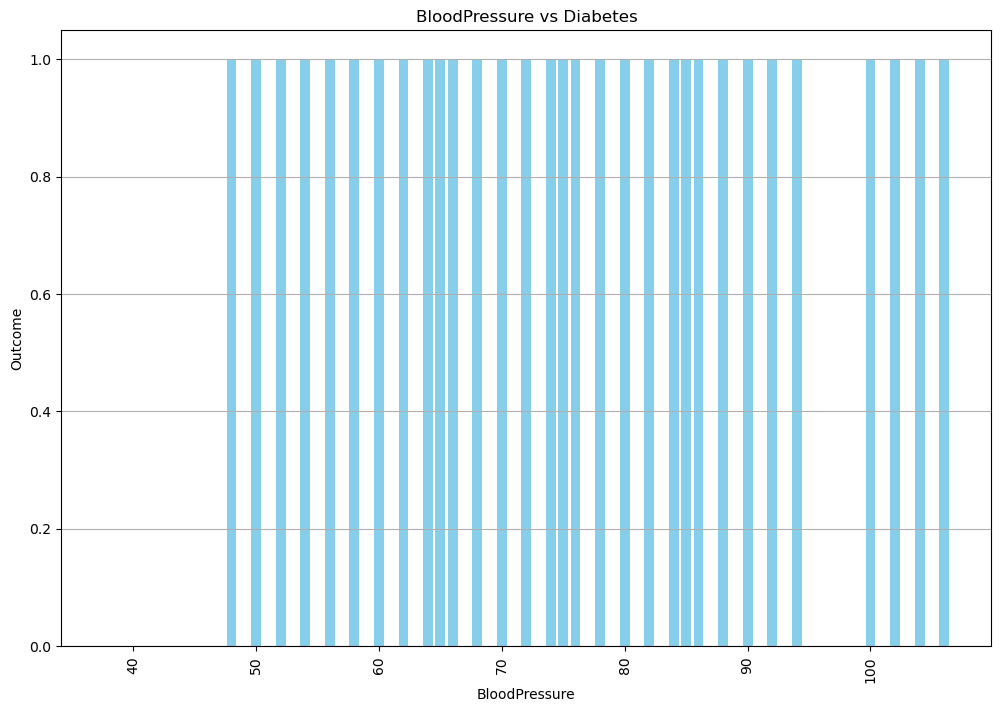

In [95]:

# Define the columns to plot
age = cleaned_data['BloodPressure']
diabetes = cleaned_data['Outcome']

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(age, diabetes, color='skyblue')
plt.title('BloodPressure vs Diabetes')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

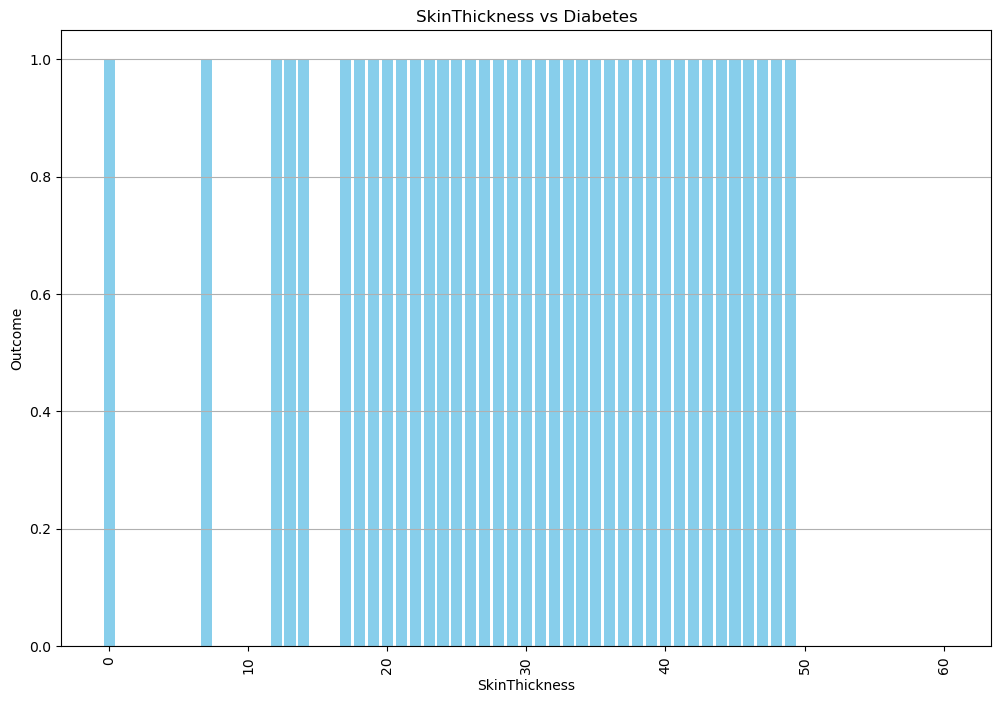

In [96]:

# Define the columns to plot
age = cleaned_data['SkinThickness']
diabetes = cleaned_data['Outcome']

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(age, diabetes, color='skyblue')
plt.title('SkinThickness vs Diabetes')
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

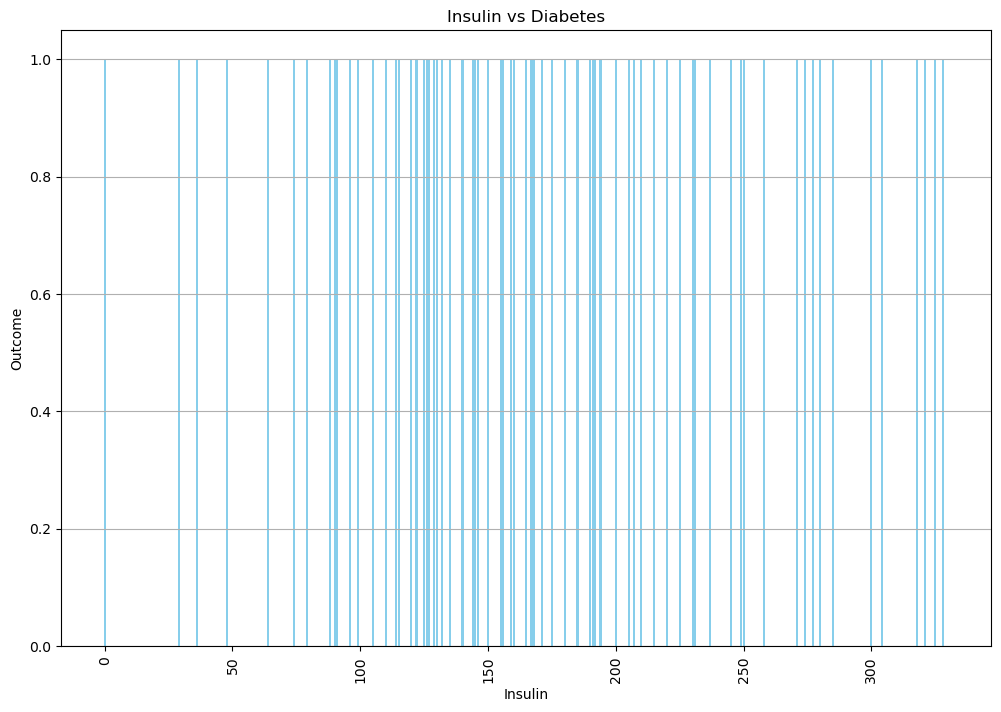

In [97]:

# Define the columns to plot
age = cleaned_data['Insulin']
diabetes = cleaned_data['Outcome']

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(age, diabetes, color='skyblue')
plt.title('Insulin vs Diabetes')
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

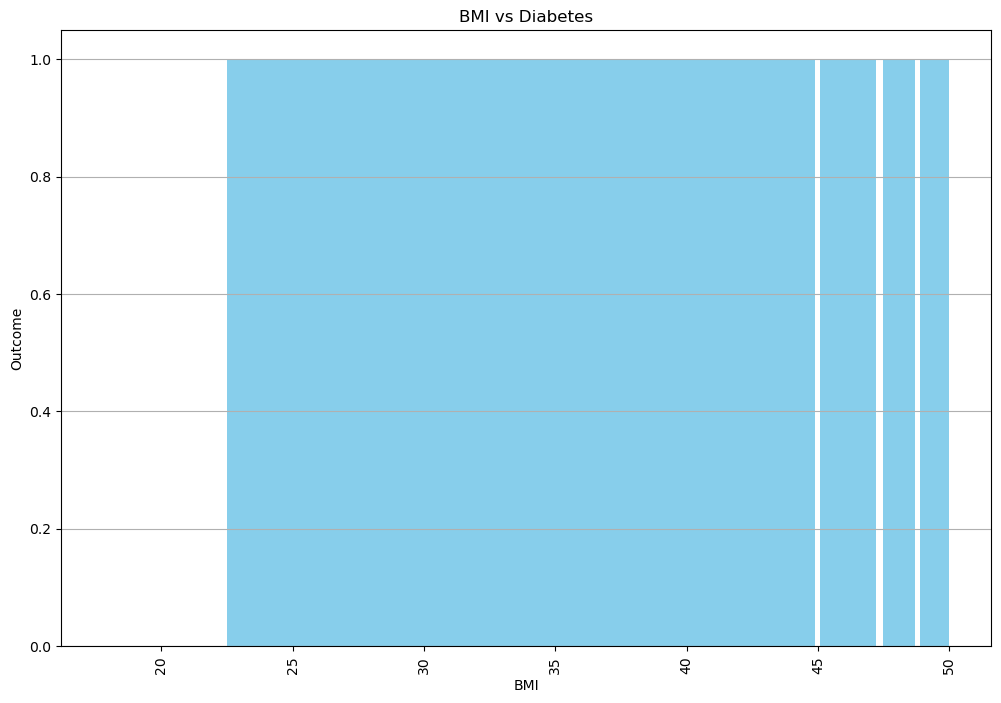

In [99]:

# Define the columns to plot
age = cleaned_data['BMI']
diabetes = cleaned_data['Outcome']

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(age, diabetes, color='skyblue')
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

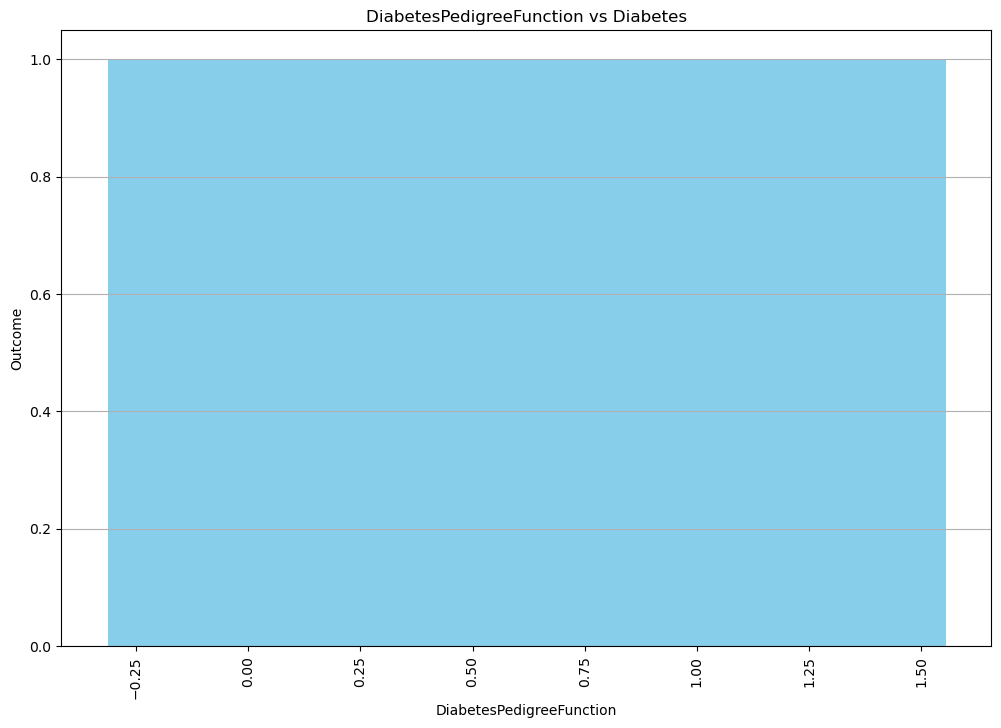

In [100]:

# Define the columns to plot
age = cleaned_data['DiabetesPedigreeFunction']
diabetes = cleaned_data['Outcome']

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(age, diabetes, color='skyblue')
plt.title('DiabetesPedigreeFunction vs Diabetes')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

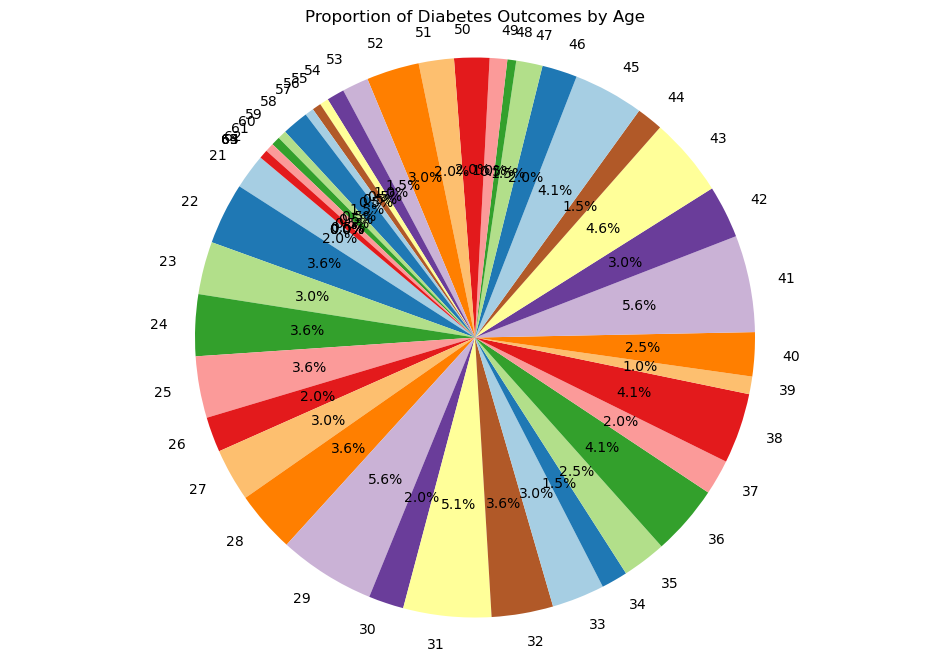

In [88]:
import matplotlib.pyplot as plt

# Aggregate the data by age to get the sum of diabetes outcomes for each age
age_diabetes_sum = cleaned_data.groupby('Age')['Outcome'].sum()

# Define the labels and sizes for the pie chart
labels = age_diabetes_sum.index
sizes = age_diabetes_sum.values

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Diabetes Outcomes by Age')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [58]:
## train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
x_train.shape,y_train.shape

((508, 8), (508,))

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
    

In [61]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))
           

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        92
           1       0.58      0.58      0.58        36

    accuracy                           0.77       128
   macro avg       0.71      0.71      0.71       128
weighted avg       0.77      0.77      0.77       128



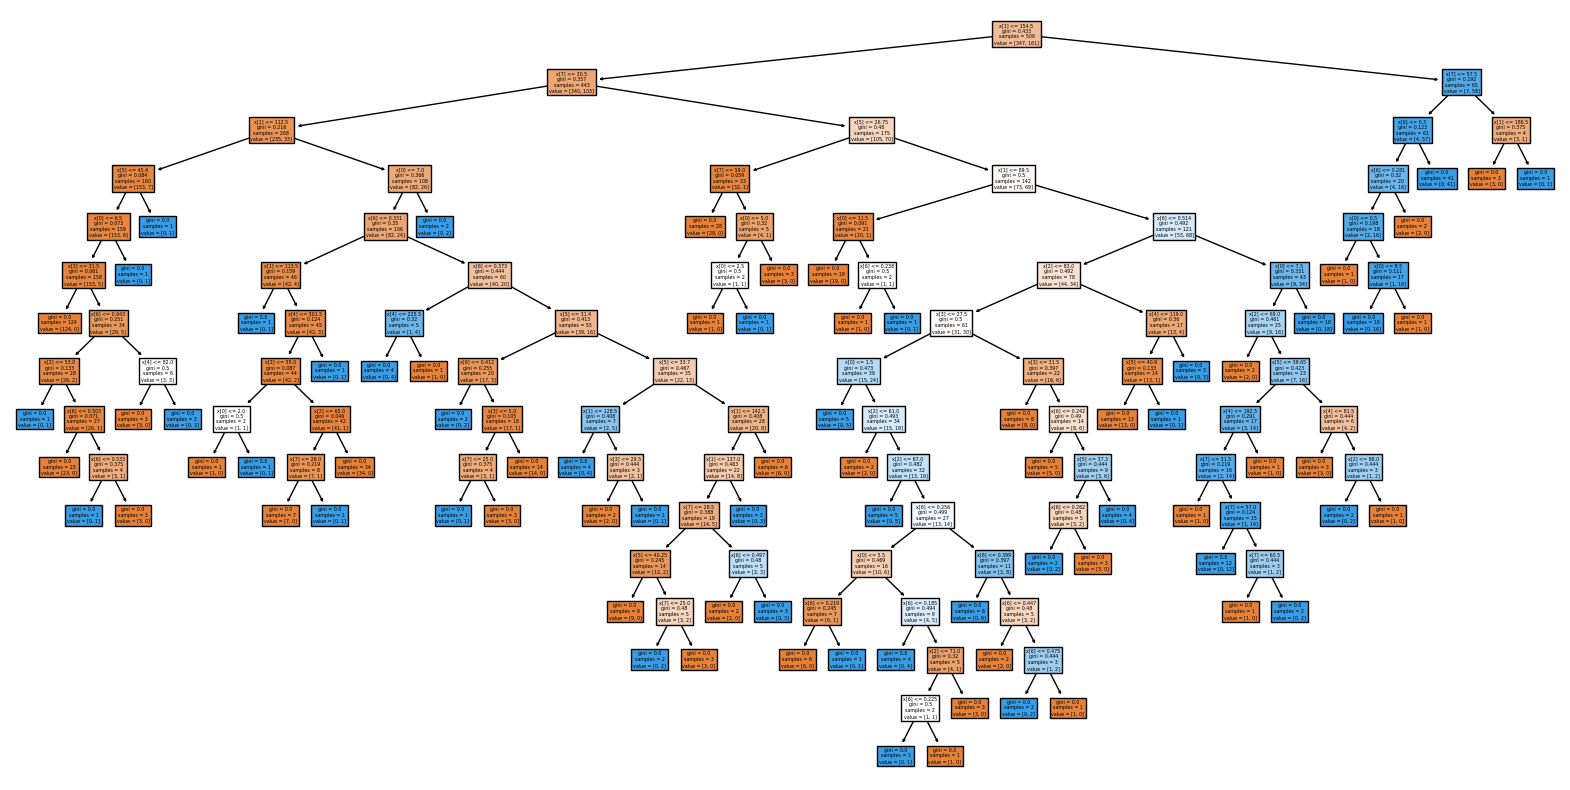

In [63]:
# desplay the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()

#### Decision tree using Entropy

In [64]:
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
y_pred2 = model2.predict(x_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        92
           1       0.46      0.50      0.48        36

    accuracy                           0.70       128
   macro avg       0.63      0.64      0.63       128
weighted avg       0.70      0.70      0.70       128



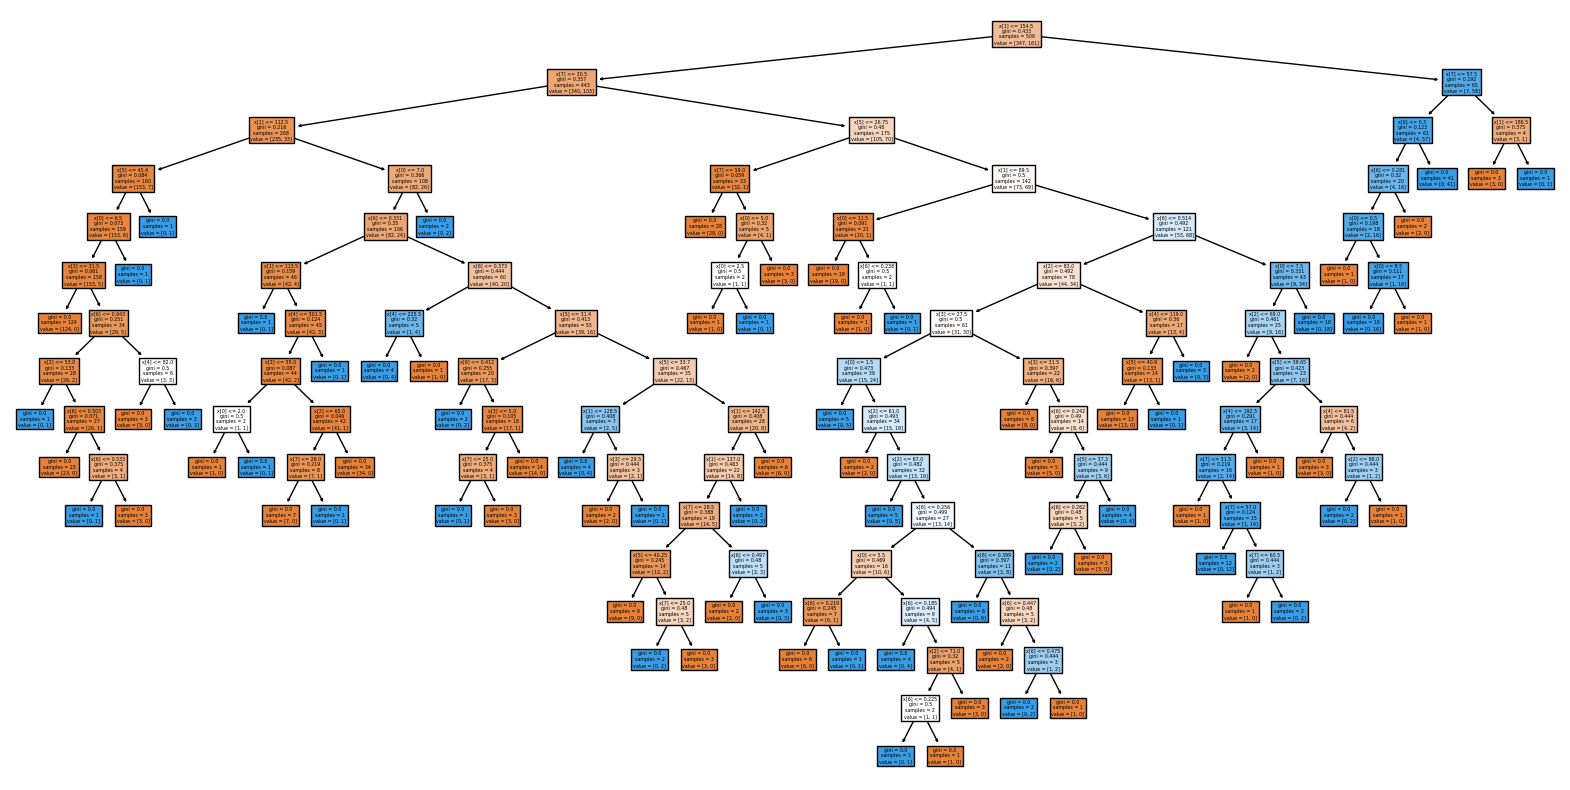

In [66]:
# desplay the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()

#### The Gini method is the better choice based on the provided metrics. It has higher accuracy, and better precision, recall, and f1-scores for both classes.

In [75]:
new_values = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

# Make predictions with the new data
predictions = model.predict(new_values)

# Print the predictions
print("Predictions for new values:", predictions)

Predictions for new values: [1]


C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# KNN Algorithem

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [77]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [78]:
Y_pred = knn.predict(x_test)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        92
           1       0.55      0.31      0.39        36

    accuracy                           0.73       128
   macro avg       0.66      0.60      0.61       128
weighted avg       0.71      0.73      0.71       128



In [80]:
knn.predict([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

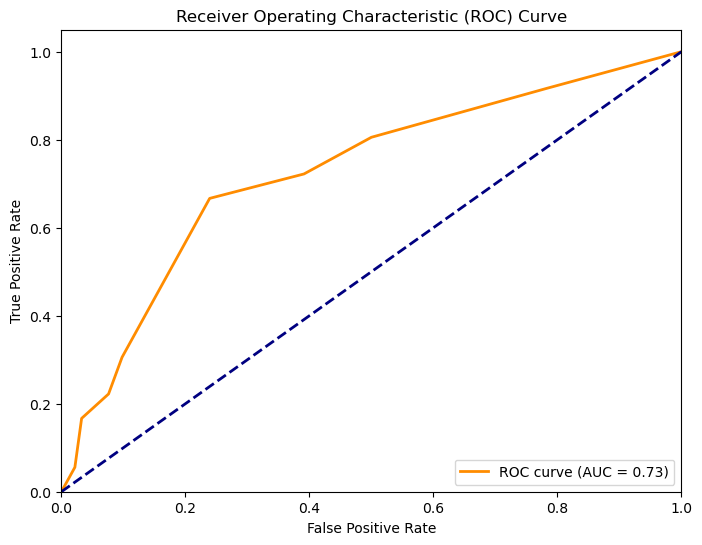

In [84]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = knn.predict_proba(x_test)[:, 1]

# Encode class labels to binary labels
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_binary, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# SVM Algorithem

In [81]:
from sklearn.svm import SVC
model_svm = SVC()

In [82]:
model_svm.fit(x_train,y_train)

SVC()

In [83]:
y_prediction = model_svm.predict(x_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        92
           1       0.57      0.36      0.44        36

    accuracy                           0.74       128
   macro avg       0.67      0.63      0.64       128
weighted avg       0.72      0.74      0.72       128



# Random Forest classifier

In [102]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = cleaned_data.drop('Outcome', axis=1)
y = cleaned_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Random Forest Classifier Performance:
Accuracy: 0.7421875
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        92
           1       0.55      0.44      0.49        36

    accuracy                           0.74       128
   macro avg       0.67      0.65      0.66       128
weighted avg       0.73      0.74      0.73       128



## The Decision Tree (Gini method) appears to be the best-performing algorithm